In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
import os
import sys
from sklearn.preprocessing import StandardScaler
root = "/project/wyin/jlee/ml-project/"
util_loc = os.path.join(root, "utils")
sys.path.append(util_loc)
from forward_utilities import LitNeuralNet, ScaledData, see_results

data_loc = os.path.join(root, "dos-prediction-sparse/data/random")
model_loc = os.path.join(root, "dos-prediction-sparse/neural-nets/random/hyperparameters/logs/long-arch-search-2")

In [17]:
check_dir = os.path.join(model_loc, "[3, 204, 408, 612, 816, 1020, 301],0.001,256,0.5/version_0/checkpoints")
check_dir = os.path.join(root, check_dir)
check_file = os.path.join(check_dir, os.listdir(check_dir)[0])
model = LitNeuralNet.load_from_checkpoint(check_file)

data = ScaledData(data_loc)

model mse: 2.311732528903552e-05


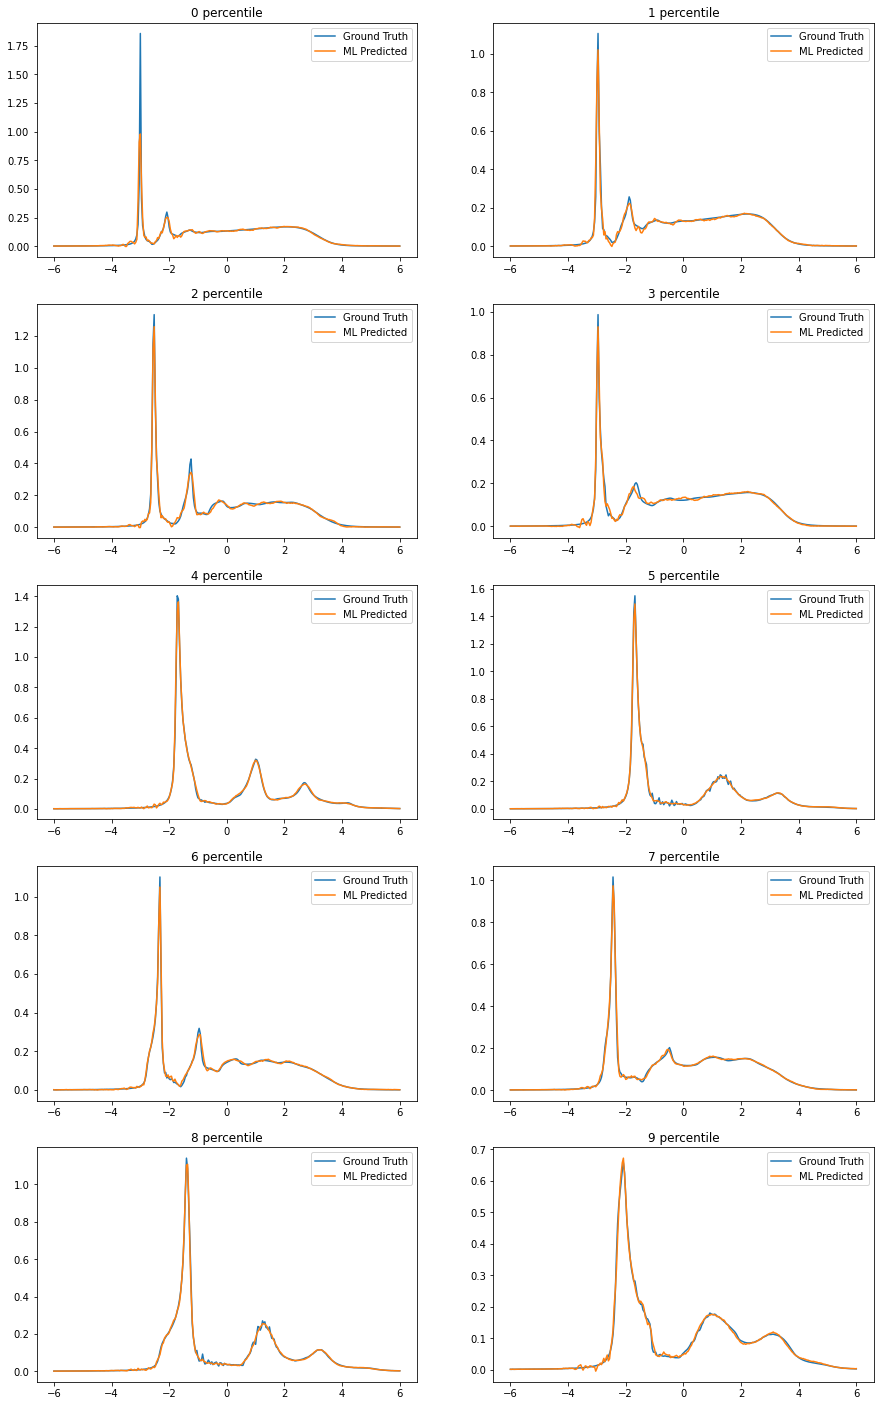

In [18]:
test_params_tensor = torch.from_numpy(data.test_params).float()
predicted = model.forward_prop(test_params_tensor).detach().numpy()
see_results(predicted, data.test_dos, (5, 2), np.arange(0, 10, 1))